In [77]:
#Importing the basic librarires fot analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('coches-de-segunda-mano-sample.csv')

# Look at the variables names
print(df.columns)

# Check the data types
print(df.dtypes)

# Summary Statistics
print(df.describe)

df.head()

Index(['url', 'company', 'make', 'model', 'version', 'price', 'price_financed',
       'fuel', 'year', 'kms', 'power', 'doors', 'shift', 'color', 'photos',
       'is_professional', 'dealer', 'province', 'country', 'publish_date',
       'insert_date'],
      dtype='object')
url                 object
company             object
make                object
model               object
version             object
price                int64
price_financed     float64
fuel                object
year               float64
kms                  int64
power              float64
doors                int64
shift               object
color               object
photos               int64
is_professional       bool
dealer              object
province            object
country             object
publish_date        object
insert_date         object
dtype: object
<bound method NDFrame.describe of                                     url                           company  \
0      e158ae0ca53119ca199c28c36

,url,company,make,model,version,price,price_financed,fuel,year,kms,...,doors,shift,color,photos,is_professional,dealer,province,country,publish_date,insert_date
0,e158ae0ca53119ca199c28c36b5c2fcd,9881bcdd5a0ad4733037b3fb25e69c3a,SEAT,Toledo,SEAT Toledo 4p.,950,NaN,Diésel,2000.0,227000,...,4,Manual,Verde,5,False,0f4bb8455d27349b8273109b66a847f3,Navarra,Spain,2020-12-18 10:47:13,2021-01-15 00:00:00
1,ff267ebb7e700246f47f84f3db660b4b,9881bcdd5a0ad4733037b3fb25e69c3a,CITROEN,C1,CITROEN C1 PureTech 60KW 82CV Feel 5p.,6200,NaN,Gasolina,2017.0,50071,...,5,Manual,Blanco,6,True,Autos Raymara,Tenerife,Spain,2021-01-02 11:25:40,2021-01-15 00:00:00
2,de4b02db28ea7786c622b969be10c7c7,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit Connect,FORD Transit Connect Van 1.5 TDCi 100cv Ambien...,7851,7024.0,Diésel,2016.0,103000,...,4,Manual,Blanco,10,True,Auto 96,Barcelona,Spain,2020-12-16 10:51:45,2021-01-15 00:00:00
3,0449972a4d07594acf92e9a7dd28b39c,9881bcdd5a0ad4733037b3fb25e69c3a,VOLKSWAGEN,Caravelle,VOLKSWAGEN Caravelle Largo 2.0 TDI 140 Comfort...,19426,NaN,Diésel,2014.0,120000,...,4,Manual,Blanco,9,True,Inniauto,Navarra,Spain,2020-11-25 11:09:14,2021-01-15 00:00:00
4,12c4fa49bd4fdf23f19ecf396d3f02ef,9881bcdd5a0ad4733037b3fb25e69c3a,FORD,Transit,FORD Transit 350 96kW L4 Ambiente Propulsion T...,22850,22800.0,Diésel,2017.0,107000,...,2,Manual,Blanco,4,True,"Autofleet España,s.l",Sevilla,Spain,2021-01-12 20:00:34,2021-01-15 00:00:00


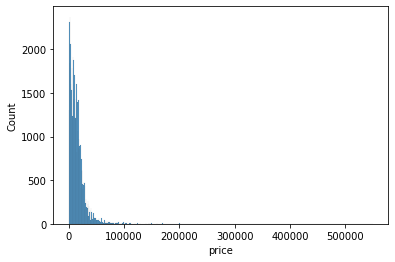

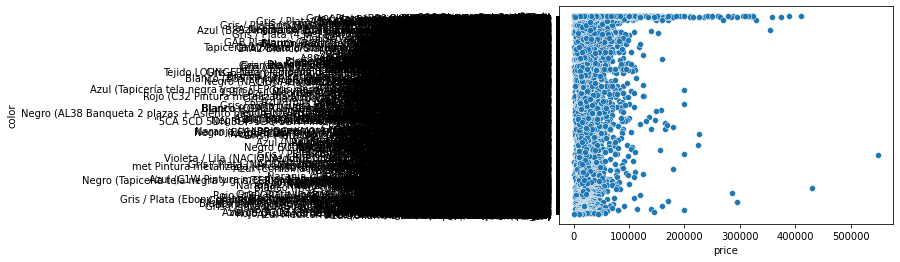

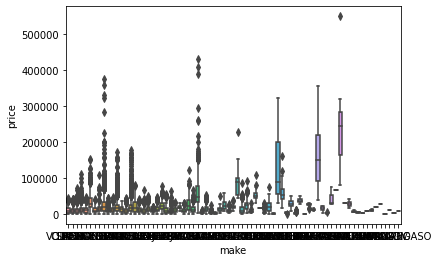

In [79]:
# Histogram  of prices 
sns.histplot(df['price'])
plt.show()

# Scatter plot of price vs. km
sns.scatterplot(x='price', y='color', data=df)
plt.show()

# Box plot of price by make
sns.boxplot(x="make", y="price", data=df)
plt.show()

In [80]:
# Check for missing values
print(df.isnull().sum())

# Delete column price_financed (not useful and lots of na)
df.drop(['price_financed'], axis = 1, inplace = True)

# Delete other non useful columns
df.drop(columns=['url', 'company', 'publish_date', 'insert_date'], inplace=True)

# Drop rows with missing values
cars = df.dropna()

# Show new dataframe
cars.shape[0]

url                    0
company                0
make                   2
model                  5
version                0
price                  0
price_financed     26437
fuel                  46
year                   2
kms                    0
power               8528
doors                  0
shift                111
color                594
photos                 0
is_professional        0
dealer                 0
province               6
country                0
publish_date           0
insert_date            0
dtype: int64


41245

In [81]:
# Calculate the average price by make
avg_price_by_make = cars.groupby("make")["price"].mean()
print(avg_price_by_make)

# Find the cars with high km and low price
high_kms_low_price =  cars[(cars['kms'] > 100000) & (cars['price'] < 5000)]
print(high_kms_low_price)

make
ABARTH          19098.333333
ALFA ROMEO      16249.721992
ALPINE          66000.000000
ASTON MARTIN    89578.666667
AUDI            21693.847582
                    ...     
TESLA           53672.956522
TOYOTA          13848.601591
UMM              8000.000000
VOLKSWAGEN      15160.267028
VOLVO           23194.260749
Name: price, Length: 71, dtype: float64
             make        model  \
12     VOLKSWAGEN         Polo   
43        PEUGEOT         1007   
75        PEUGEOT          406   
83     VOLKSWAGEN       Passat   
88           FIAT  Doblò Cargo   
...           ...          ...   
49937        SEAT        Ibiza   
49944     RENAULT       Mégane   
49958        FORD        Focus   
49982     CITROEN     Berlingo   
49999     CITROEN           C2   

                                                 version  price  \
12                 VOLKSWAGEN Polo 75 Trendline Auto 3p.   1300   
43                   PEUGEOT 1007 1.6 Sporty 2Tronic 3p.   4200   
75                        

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


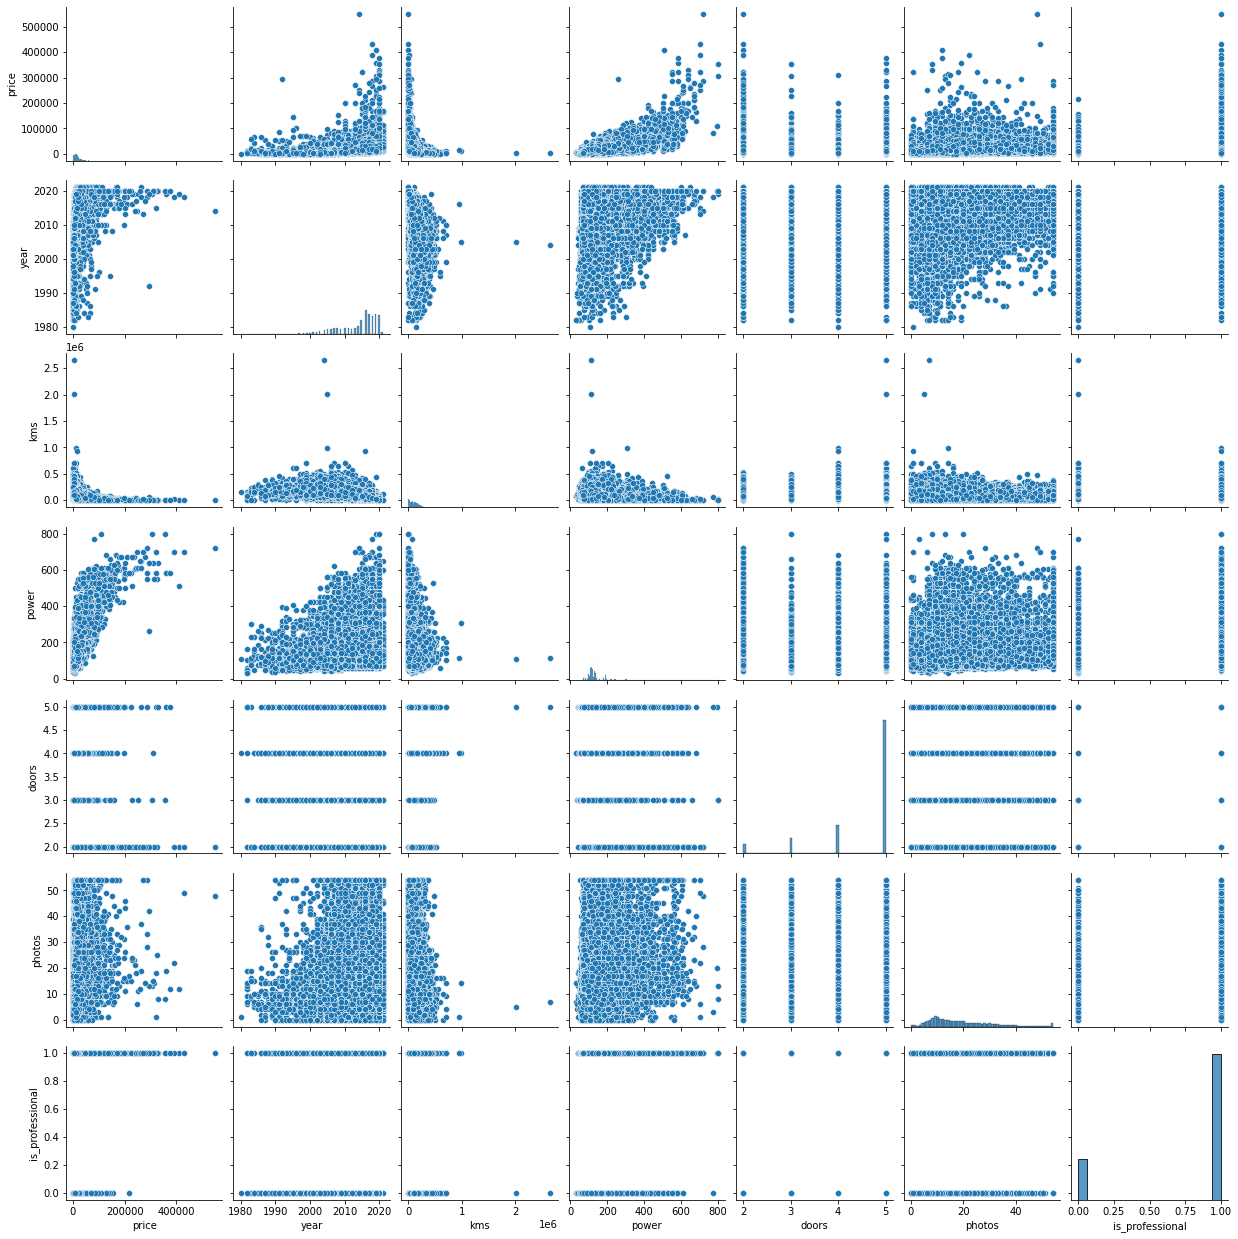

                    price      year       kms     power     doors    photos  \
price            1.000000  0.410204 -0.404284  0.693618 -0.029989  0.194913   
year             0.410204  1.000000 -0.720888  0.027732  0.306189  0.270111   
kms             -0.404284 -0.720888  1.000000 -0.013508 -0.160715 -0.198167   
power            0.693618  0.027732 -0.013508  1.000000 -0.159470  0.153562   
doors           -0.029989  0.306189 -0.160715 -0.159470  1.000000  0.092851   
photos           0.194913  0.270111 -0.198167  0.153562  0.092851  1.000000   
is_professional  0.205932  0.465872 -0.372252  0.003743  0.182832  0.426442   

                 is_professional  
price                   0.205932  
year                    0.465872  
kms                    -0.372252  
power                   0.003743  
doors                   0.182832  
photos                  0.426442  
is_professional         1.000000  


C:\Users\adria\AppData\Local\Temp\ipykernel_9800\1851840614.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cars.corr()


In [82]:
# Visualize the relationships between the variables
sns.pairplot(cars)
plt.show()

# Calculate Pearson's correlation coefficient
corr = cars.corr()
print(corr)

In [83]:
# Build a linear regression model to predict

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Select the variables to use in the model
X = cars[["kms", "year","power","doors"]]
y = cars["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Calculate the error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 5055.232680856805
Root Mean Squared Error: 10565.76781168133
Mean Absolute Percentage Error: 57.723257300281816


In [84]:
from sklearn.preprocessing import LabelEncoder 

# Create a LabelEncoder object
make_le = LabelEncoder()
model_le = LabelEncoder()
version_le = LabelEncoder()
fuel_le = LabelEncoder()
shift_le = LabelEncoder()
color_le = LabelEncoder()
province_le = LabelEncoder()

# Fit the encoder to the "make" column
make_le.fit(cars["make"])
model_le.fit(cars["model"])
version_le.fit(cars["version"])
fuel_le.fit(cars["fuel"])
shift_le.fit(cars["shift"])
color_le.fit(cars["color"]) 
province_le.fit(cars["province"])

# Transform the "make" column into numeric values
make_encoded = make_le.transform(cars["make"])
model_encoded = model_le.transform(cars["model"])
version_encoded = version_le.transform(cars["version"])
fuel_encoded = fuel_le.transform(cars["fuel"])
shift_encoded = shift_le.transform(cars["shift"])
color_encoded = color_le.transform(cars["color"])  
province_encoded = province_le.transform(cars["province"]) 

# Add the encoded values to the dataset
cars["make_encoded"] = make_encoded
cars["model_encoded"] = model_encoded
cars["version_encoded"] = version_encoded
cars["fuel_encoded"] = fuel_encoded
cars["shift_encoded"] = shift_encoded
cars["color_encoded"] = color_encoded 
cars["province_encoded"] = province_encoded

C:\Users\adria\AppData\Local\Temp\ipykernel_9800\3521065397.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["make_encoded"] = make_encoded
C:\Users\adria\AppData\Local\Temp\ipykernel_9800\3521065397.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars["model_encoded"] = model_encoded
C:\Users\adria\AppData\Local\Temp\ipykernel_9800\3521065397.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [85]:
# Build a linear regression model to predict

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# Select the variables to use in the model
X = cars[["make_encoded", "model_encoded", "version_encoded", "fuel_encoded", "kms", "year", "power", "doors", "shift_encoded", "color_encoded", "is_professional", "province_encoded"]]
y = cars["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Calculate the error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Error: 4971.075167398173
Root Mean Squared Error: 9168.139342641904
Mean Absolute Percentage Error: 59.65995721693014


In [86]:
# We Calculate Pearson's correlation coefficient again but this time we have encoded the object data types to numeric
corr = cars.corr()['price'].sort_values()
print(corr)

shift_encoded      -0.424406
kms                -0.404284
version_encoded    -0.068318
make_encoded       -0.057559
doors              -0.029989
province_encoded   -0.004448
color_encoded       0.019932
model_encoded       0.039197
fuel_encoded        0.103929
photos              0.194913
is_professional     0.205932
year                0.410204
power               0.693618
price               1.000000
Name: price, dtype: float64


C:\Users\adria\AppData\Local\Temp\ipykernel_9800\1363244676.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = cars.corr()['price'].sort_values()


In [87]:
# Import the necessary libraries and packages

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# Select the variables to use in the model
X = cars[["make_encoded", "model_encoded", "version_encoded", "fuel_encoded", "kms", "year", "power", "doors", "shift_encoded", "color_encoded", "is_professional", "province_encoded"]]
y = cars["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a tree model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Calculate the error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)


Mean Absolute Error: 2962.343354345132
Root Mean Squared Error: 7721.194071337033
Mean Absolute Percentage Error: 22.515304671898377


In [88]:
# Import the necessary libraries and packages

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Select the variables to use in the model
X = cars[["make_encoded", "model_encoded", "version_encoded", "fuel_encoded",  "year", "kms", "power", "doors", "shift_encoded", "color_encoded", "is_professional", "province_encoded"]]
y = cars["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train a random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Calculate the error metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Percentage Error:", mape)


Mean Absolute Error: 2240.2177389101184
Root Mean Squared Error: 5567.837918627551
Mean Absolute Percentage Error: 17.51282096002331


In [129]:

new_row_2 = {'make':'CITROEN', 'model': 'C1', 'version': 'CITROEN C1 PureTech 60KW 82CV Feel 5p.', 'fuel': 'Gasolina', 'year': 2000.0, 'kms': 55505, 'power': 82.0, 
'doors': 5, 'shift': 'Manual', 'color':'Blanco', 'is_professional': True, 'province': 'Tenerife'}

new_row = {'make':'BMW', 'model': 'Serie 3', 'version': 'BMW Serie 3 320D 4p.', 'fuel': 'Diésel', 'year': 2004.0, 'kms': 220000.0, 'power': 150.0, 
'doors': 5, 'shift': 'Manual', 'color':'Azul', 'is_professional': False, 'province': 'Valencia'}

my_car = pd.DataFrame(new_row, index=[0])

# Transform the "make" column into numeric values
make_encoded = make_le.transform(my_car["make"])
model_encoded = model_le.transform(my_car["model"])
version_encoded = version_le.transform(my_car["version"])
fuel_encoded = fuel_le.transform(my_car["fuel"])
shift_encoded = shift_le.transform(my_car["shift"])
color_encoded = color_le.transform(my_car["color"])  
province_encoded = province_le.transform(my_car["province"]) 

# Add the encoded values to the dataset
my_car["make_encoded"] = make_encoded
my_car["model_encoded"] = model_encoded
my_car["version_encoded"] = version_encoded
my_car["fuel_encoded"] = fuel_encoded
my_car["shift_encoded"] = shift_encoded
my_car["color_encoded"] = color_encoded 
my_car["province_encoded"] = province_encoded

X = my_car[["make_encoded", "model_encoded", "version_encoded", "fuel_encoded",  "year", "kms", "power", "doors", "shift_encoded", "color_encoded", "is_professional", "province_encoded"]]

my_car.head(1)

y_pred = model.predict(X)

print(y_pred)

[4284.92]


In [127]:

cars.loc[cars['model'] == 'Serie 3']


,make,model,version,price,fuel,year,kms,power,doors,shift,...,dealer,province,country,make_encoded,model_encoded,version_encoded,fuel_encoded,shift_encoded,color_encoded,province_encoded
31,BMW,Serie 3,BMW Serie 3 320D 2p.,10000,Diésel,2009.0,162000,177.0,2,Automático,...,Luxury Autos Madrid,Madrid,Spain,7,691,1750,0,0,881,29
176,BMW,Serie 3,BMW Serie 3 318d Touring 5p.,16950,Diésel,2015.0,85000,143.0,5,Manual,...,4e8e3b5e6cd4821f359c07728949dd5c,Girona,Spain,7,691,1743,0,1,881,17
210,BMW,Serie 3,BMW Serie 3 320D 4p.,2500,Diésel,2001.0,283400,136.0,4,Manual,...,724e48d095238160e65ab5f697ad0237,Guipúzcoa,Spain,7,691,1751,0,1,2592,20
292,BMW,Serie 3,BMW Serie 3 320D TOURING 5p.,20990,Diésel,2015.0,69000,190.0,5,Manual,...,TOP CAR,Álava,Spain,7,691,1752,0,1,2337,50
363,BMW,Serie 3,BMW Serie 3 M3 2p.,27500,Gasolina,2002.0,194948,343.0,2,Automático,...,GScars,Girona,Spain,7,691,1848,4,0,1577,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49662,BMW,Serie 3,BMW Serie 3 320d EfficientDynamics Touring 5p.,11990,Diésel,2014.0,221000,163.0,5,Manual,...,Automóviles Cobeña,Madrid,Spain,7,691,1766,0,1,2592,29
49696,BMW,Serie 3,BMW Serie 3 318I 4p.,2750,Gasolina,1991.0,250000,113.0,4,Manual,...,3ff8324c1d89c3091218607216944be5,Madrid,Spain,7,691,1728,4,1,881,29
49704,BMW,Serie 3,BMW Serie 3 330i 2p.,14900,Gasolina,2008.0,203077,272.0,2,Manual,...,Automóviles Ciprés,Málaga,Spain,7,691,1824,4,1,881,32
49799,BMW,Serie 3,BMW Serie 3 320I AUTO TOURING 5p.,6800,Gasolina,2008.0,141000,170.0,5,Automático,...,AMG AUTOMOVILES,Málaga,Spain,7,691,1754,4,0,295,32
